In [5]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(210187)

In [6]:
# define the p.d.f. N(1, 2)
from scipy.stats import norm
pdf = norm(loc=1, scale=2)

# generate the data
X_i = pdf.rvs(size=250)

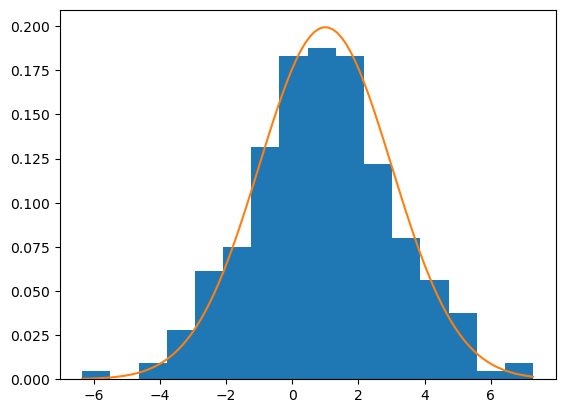

In [7]:
# Visualisation of our normal generated data
plt.hist( X_i, bins='auto', density=True )
x = np.linspace( np.min(X_i), np.max(X_i), 100 )
plt.plot(x, pdf.pdf(x) )

In [8]:
# make the likelihood function
def likelihood(mu, sg):
    return np.prod( norm.pdf(X_i, mu, sg) )

In [9]:
# re-write the likelihood function based on summing logs
def likelihood(mu, sg) :
    return np.exp( np.sum(  norm.logpdf(X_i, mu, sg) ) )

In [10]:
# vectorise the function so we can pass arrays for mu and sigma
vec_likelihood = np.vectorize( likelihood )

Text(0.5, 0.5, '$\\sigma$')

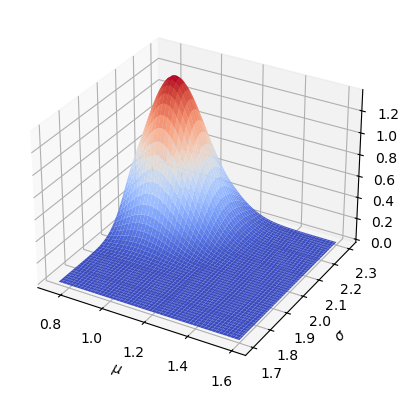

In [11]:
# now draw it
mu = np.linspace(0.75,1.6,100)
sg = np.linspace(1.7,2.3,100)

mu, sg = np.meshgrid(mu, sg)
L = vec_likelihood(mu, sg)

fig, ax = plt.subplots( subplot_kw={"projection":"3d"} )
ax.plot_surface( mu, sg, L, cmap='coolwarm' )
ax.set_xlabel('$\mu$')
ax.set_ylabel('$\sigma$')

Text(0, 0.5, '$L(\\sigma)$')

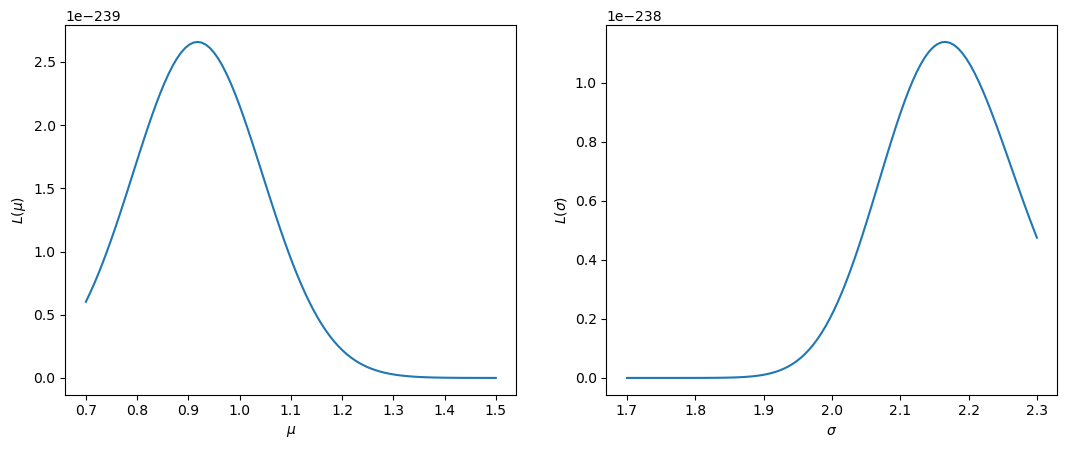

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(12.8, 4.8) )

# mu projection
mu = np.linspace(0.7,1.5,100)
sg = np.full_like(mu, 2)
ax[0].plot(mu, vec_likelihood(mu, sg))
ax[0].set_xlabel('$\mu$')
ax[0].set_ylabel('$L(\mu)$')

# sg projection
sg = np.linspace(1.7,2.3,100)
mu = np.full_like(sg, 1)
ax[1].plot(sg, vec_likelihood(mu, sg))
ax[1].set_xlabel('$\sigma$')
ax[1].set_ylabel('$L(\sigma)$')